In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class PolyReg:
    """
    No parameters are fixed.
    Object to hold all information associated with a polynomial model.
    Polynomial coefficients in order of decreasing degree are in coef[i].
    Note that ss_yy is commonly named ss_tot in other implementations.
    coef = ndarray of fitting parameters in order of decreasing degree
    ss_res = sum of squares of residuals.
    std_err = ndarray of standard errors of the fitting parameters in order of decreasing degree.
    These are calculated as the square root of diagonal elements in the covariance matrix
    """
    def __init__(self, xdata, ydata, degree):
        self.xdata = xdata
        self.ydata = ydata
        self.degree = degree
        self.coef, self.cov = np.polyfit(xdata, ydata, degree, cov=True)
        self.residuals = ydata - np.polyval(self.coef, xdata)
        self.ss_res = np.sum(self.residuals**2)
        self.ss_yy = np.sum((ydata - np.mean(ydata)) ** 2)
        self.ss_xx = np.sum((xdata - np.mean(xdata)) ** 2)
        self.ss_xy = np.sum((xdata - np.mean(xdata))*(ydata - np.mean(ydata)))
        self.r_squared = 1 - (self.ss_res / self.ss_yy)
        self.std_err = np.sqrt(np.diag(self.cov))
        self.s_y = np.sqrt(self.ss_res / (len(ydata) - 1 - self.degree))
        
    def __str__(self):
        coefficients = {}
        for i in self.coef:
            coefficents['coef'+str(i)] = i
        return coefficients

In [3]:
# USER DEFINED PARAMETERS
df = pd.read_csv('Indium-VR_InputsOnly_JGW-A-43.csv')
mass = 5.491 #in mg
Therm_Resist = 0.49441 #in K/mW

In [12]:
df['Height (mW)'] = df['Height (W/g)'] * mass / 1000
df['Lag Corr. Temp (C)'] = df['Peak Temp (C)'] - (df['Height (mW)'] * Therm_Resist)

<PandasArray>
[155.95055982213614]
Length: 1, dtype: float64


In [13]:
df['Lag Corr. ΔT'] = df['Lag Corr. Temp (C)'] - df.loc[df['Heat Rate']==10, 'Lag Corr. Temp (C)'].array
print(df)

   Heat Rate  log10(Heat Rate)  Peak Temp (C)  Height (W/g)  Height (mW)  \
0          1          0.000000         155.40        1.3566     0.007449   
1          2          0.301030         155.50        2.4256     0.013319   
2          5          0.698970         155.71        4.6811     0.025704   
3         10          1.000000         155.97        7.1608     0.039320   
4         15          1.176091         156.17        8.7492     0.048042   
5         20          1.301030         156.37        9.8964     0.054341   
6         50          1.698970         157.38       13.2385     0.072693   
7        100          2.000000         158.87       15.1974     0.083449   
8        150          2.176091         160.25       16.0861     0.088329   
9        200          2.301030         161.58       16.7268     0.091847   

   Lag Corr. Temp (C)  Lag Corr. ΔT  
0          155.396317     -0.554243  
1          155.493415     -0.457145  
2          155.697292     -0.253268  
3          

In [33]:
Rate_Corr = PolyReg(df['Heat Rate'], df['Lag Corr. ΔT'], 1)
print(Rate_Corr)

NameError: name 'coefficents' is not defined

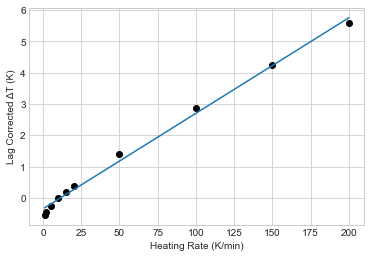

In [31]:
fig, ax1 = plt.subplots()
plt.style.use('seaborn-whitegrid')
ax1.scatter(df['Heat Rate'], df['Lag Corr. ΔT'], c='black', zorder=1)
ax1.set_ylabel('Lag Corrected ΔT (K)')
ax1.set_xlabel('Heating Rate (K/min)')
ax2 = plt.plot(df['Heat Rate'], df['Heat Rate'] * Rate_Corr.coef[0] + Rate_Corr.coef[1])